In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


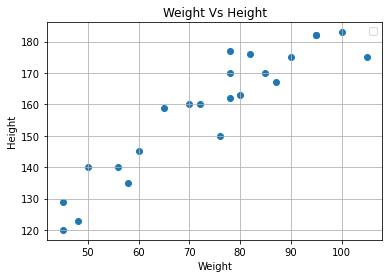

In [14]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title('Weight Vs Height')
plt.legend()
plt.grid(True)#: Adds a grid to the plot.
# plt.savefig('filename.png'): Saves the plot to a file.
# plt.show(): Displays the plot.
# plt.xlim(0, 120)#: Sets the limits for the x-axis.
# plt.ylim(0, 220)#: Sets the limits for the y-axis.

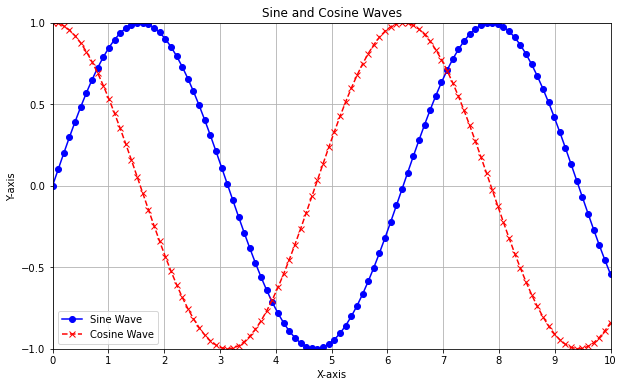

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data
ax.plot(x, y, label='Sine Wave', color='blue', linestyle='-', marker='o')
ax.plot(x, y2, label='Cosine Wave', color='red', linestyle='--', marker='x')

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sine and Cosine Waves')

# Grid, legend, and custom ticks
ax.grid(True)
ax.legend()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(-1, 1.1, 0.5))

# Set limits
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

# Save the plot
plt.savefig('sine_cosine_plot.png')

# Show the plot
plt.show()


In [16]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


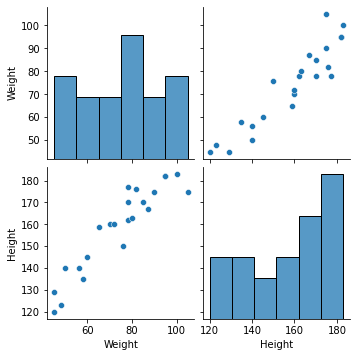

In [17]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [18]:
## Independent and dependent features
X=df[['Weight']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Height'] ## this variiable can be in series or 1d array


In [20]:
X_series=df['Weight']
X_series


0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [22]:
print(np.array(X_series))
np.array(X_series).shape

[ 45  58  48  60  70  78  80  90  95  78  82  95 105 100  85  78  50  65
  76  87  45  56  72]


(23,)

In [23]:
np.array(y).shape

(23,)

In [24]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [32]:
X_test=scaler.transform(X_test)

In [33]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [34]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [35]:
regression=LinearRegression(n_jobs=-1)

In [36]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [37]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


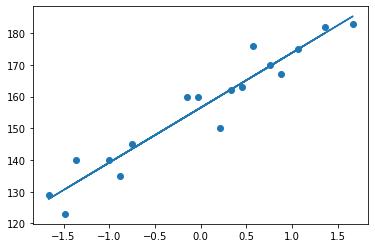

In [39]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [40]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [41]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [43]:
from sklearn.metrics import r2_score

In [44]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [45]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [55]:
## OLS Linear Regression
import statsmodels.api as sm

In [46]:
model=sm.OLS(y_train,X_train).fit()

<IPython.core.display.Javascript object>

In [47]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                       0.664
Time:                        19:51:00   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\win10\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
## Prediction For new data
regression.predict(scaler.transform([[200]]))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([290.11185046])